<a href="https://colab.research.google.com/github/jashidkt/DSML_Internship_Supply_chain_Management/blob/main/DSML_Internship_Supply_Chain_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

---

> Supply Chain Management



# **Problem Statement**

> The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse

1.   Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2.   Highlight any trend in data, deep insight, novel steps that you take
3.   Highlight next steps and improvements









**Python Packages for the Project**

---



In [2]:
#Importing Python packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
#To show maximum columns in a dataframe
pd.set_option("display.max_columns", 50)

In [3]:
#Data Loading
supply_train_data = pd.read_csv("supply_train.csv")
supply_test_data = pd.read_csv("supply_test.csv")


# **Data Understanding**


*   Data Shape
*   Data head and tail
*   Data information
*   Data description
*   Data features



In [4]:
#Display the train dataset rows and columns
supply_train_data.shape

(16620, 25)

In [5]:
#Display the test dataset rows and columns
supply_test_data.shape

(5529, 25)

In [6]:
#Display First 10 rows of data
supply_train_data.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,0,0,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,2010.0,24,0,B,3,6,30142
7,7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,NaN,18,0,C,6,24,24093
8,8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,0,0,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,0,0,0,78,43.0,NaN,6,0,C,6,2,7130


**Features of Data set**

Supply chain mangement dataset has several features and out of which, below listed are considered as critical fields


*   **num_refill_req_l3m** - Refilling request received by the warehouse in 3M
*   **transport_issue_l1y** - No. of transport issued for warehouse in last 1
year
*   **retail_shop_num** - Number of retail shops who sell noodles
produced by the warehouse
*   **distributor_num** - No. of distributor who works between
warehouse and retail shops
*   **electric_supply** - Electric supply backup provision
*   **dist_from_hub** - distance from the warehouse to production
*   **workers_num** - no. workers in the warehouse
*   **storage_issue_reported_l3m** - storage issues reported by the warehouse in
the last 3months
*   **temp_reg_mach** - warehouse having temperature regulating
machine indicator or not
*   **wh_breakdown_l3m** - Number of times the warehouse faces the
breakdown in the last 3 months
*   **product_wg_ton** - Product weight


In [7]:
#Data set information
supply_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

**Summary of Train Data**


*   There are 16620 rows of data
*   There are 24 columns of data
*   There are 3 columns (workers_num, wh_est_year & approved_wh_govt_certificate) with null values
*   There are 3 datatypes, out of which int64 (15), float64(2) & object (8)



In [8]:
#Test Data set information
supply_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

**Summary of Test Data**


*   There are 5529 rows of data
*   There are 24 columns of data
*   There are 3 columns (workers_num, wh_est_year & approved_wh_govt_certificate) with null values
*   There are 3 datatypes, out of which int64 (15), float64(2) & object (8)

In [9]:
supply_train_data.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [10]:
supply_train_data.columns


Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

# **Data Preperation**

*   Data Imputing
*   Checking for Duplicates


**Removing Unwanted Column(s)**

In [11]:
# To remove unwanted column
supply_train_data.drop(["WH_Manager_ID","Unnamed: 0"], axis=1, inplace=True)
supply_test_data.drop(["WH_Manager_ID","Unnamed: 0"], axis=1, inplace=True)


In [12]:
#Finding the null values in the train dataset
supply_train_data.isnull().sum()

Ware_house_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

**Train data Imputing**

In [13]:
#Imputing the null values in the train dataset
supply_train_data["workers_num"].fillna(supply_train_data["workers_num"].median(), inplace=True)
supply_train_data["wh_est_year"].fillna(supply_train_data["wh_est_year"].median(), inplace=True)
supply_train_data["approved_wh_govt_certificate"].fillna("NIL", inplace=True)

In [14]:
supply_train_data

,Ware_house_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,2009.0,4,0,A,3,17,5074
2,WH_100002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,2009.0,17,0,A,6,22,23137
3,WH_100003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,WH_100004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,70,0,0,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,0,0,1,164,30.0,2009.0,17,0,B+,6,24,21113
16617,WH_116617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,50,1,0,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,59,1,0,1,119,28.0,2007.0,16,0,A,5,15,21103


In [15]:
supply_train_data.isnull().sum()

Ware_house_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Test data Imputing**

In [16]:
#Finding the null values in the test dataset
supply_test_data.isnull().sum()

Ware_house_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

***Test Data Imputing***

In [17]:
#Imputing the null values in the test dataset
supply_test_data["workers_num"].fillna(supply_test_data["workers_num"].median(), inplace=True)
supply_test_data["wh_est_year"].fillna(supply_test_data["wh_est_year"].median(), inplace=True)
supply_test_data["approved_wh_govt_certificate"].fillna("NIL", inplace=True)

In [18]:
#Finding the null values in the train dataset
supply_test_data.isnull().sum()

Ware_house_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Checking for Duplicates**

In [19]:
#Check for any duplicate entry
supply_test_data.duplicated(keep=False).sum()
supply_train_data.duplicated(keep=False).sum()

0

# **Feature Understanding**

In [20]:
supply_train_data.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

**Correlation Matrix**

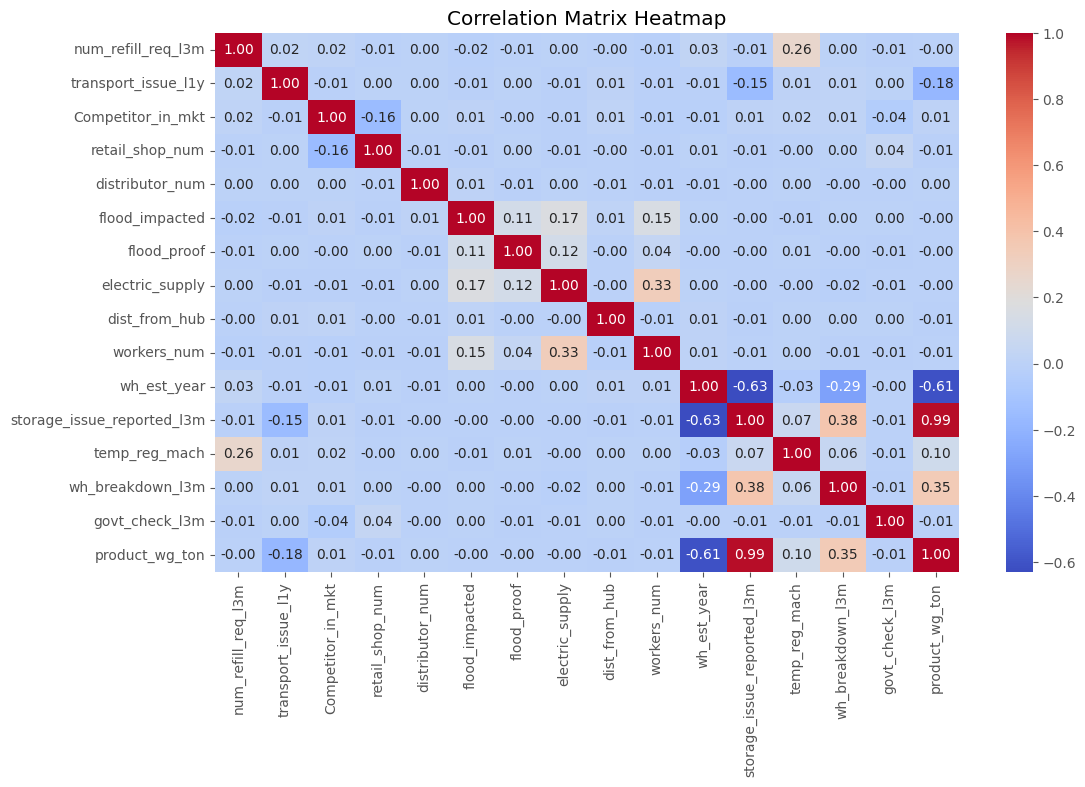

In [21]:
#Catagorizing numeric only data
numeric_dataset = supply_train_data.select_dtypes(include=["number"])
#Catagorizing Object only data
Object_dataset = supply_train_data.select_dtypes(include=["object"])

correlation_matrix = numeric_dataset.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

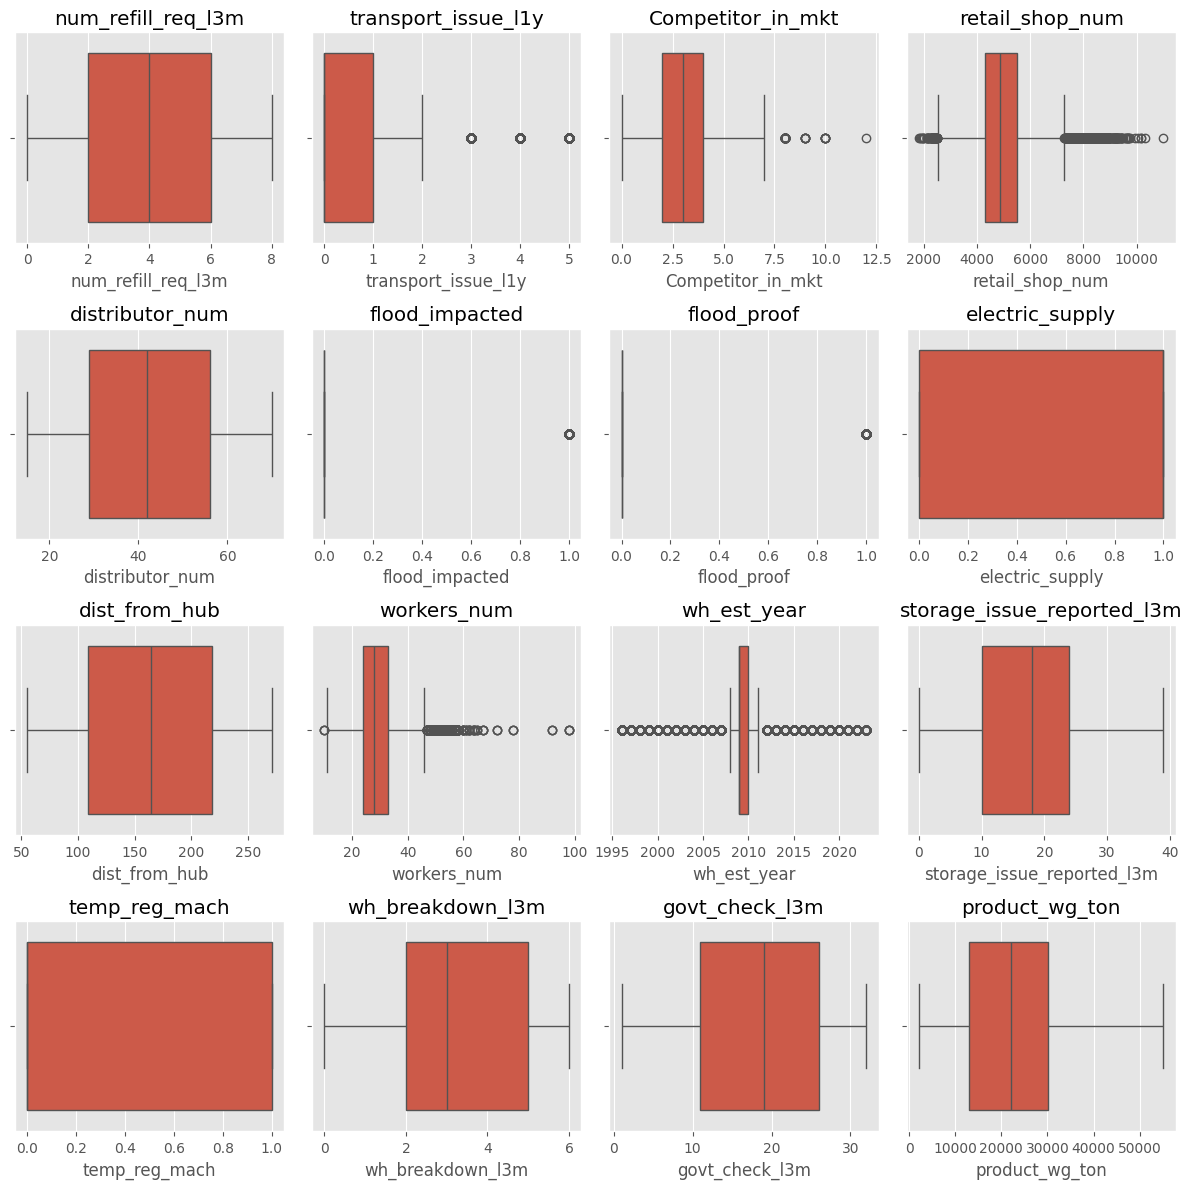

In [22]:
plt.figure(figsize=(12, 12))
for index, columns in enumerate(numeric_dataset, 1):
  plt.subplot(4,4,index)
  sns.boxplot(x=supply_train_data[columns])
  plt.title(columns)
plt.tight_layout()
plt.show()

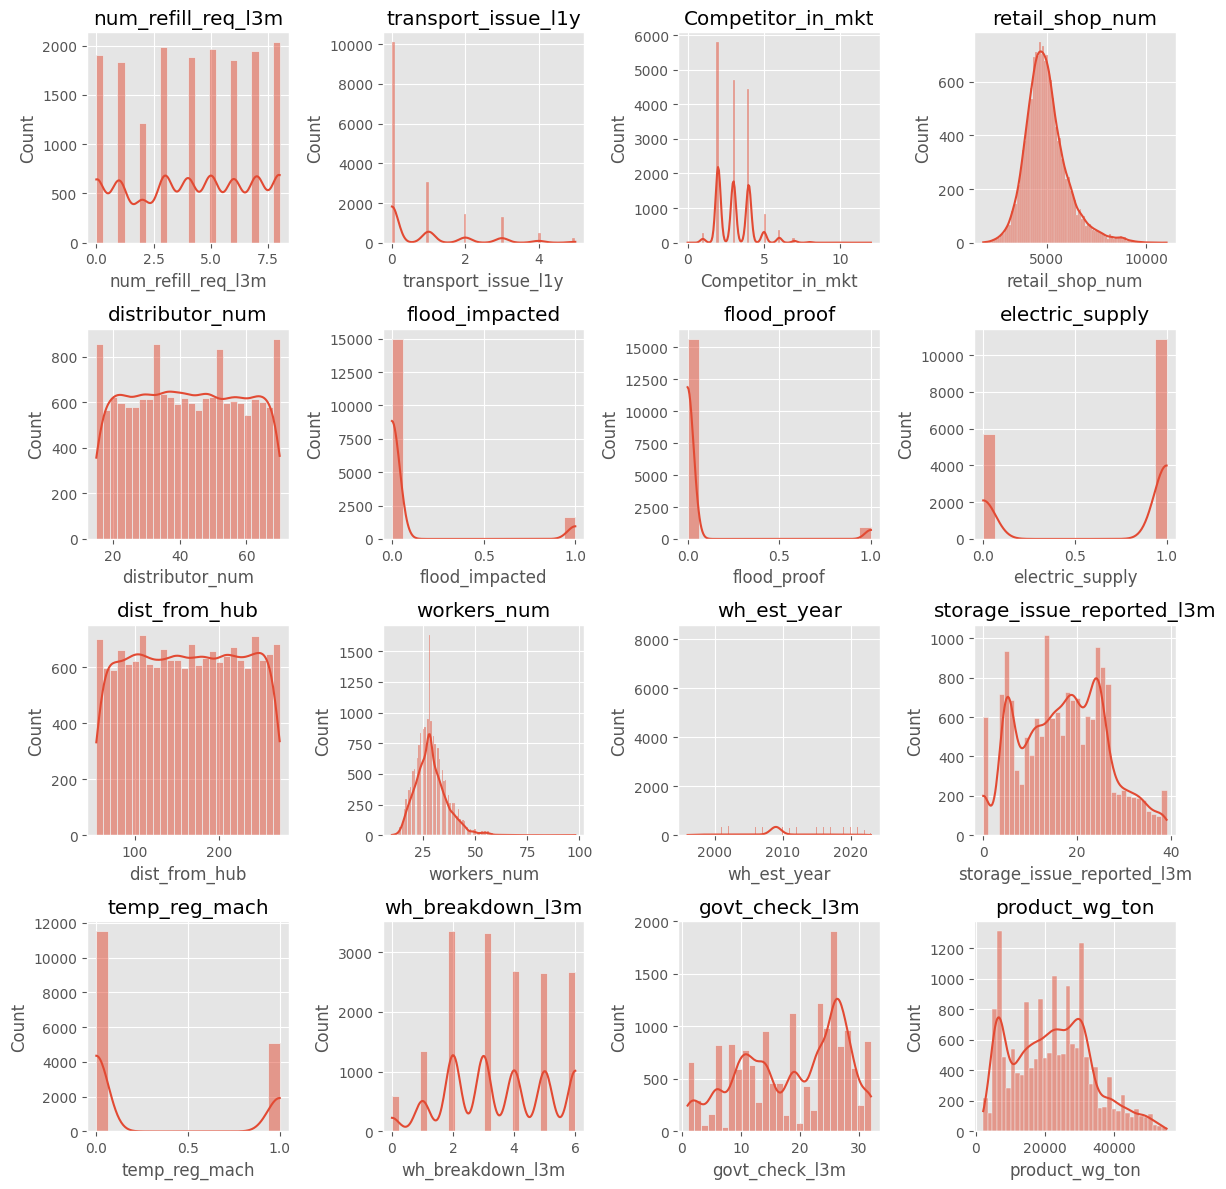

In [23]:
plt.figure(figsize=(12, 12))
for index, columns in enumerate(numeric_dataset, 1):
  plt.subplot(4,4,index)
  sns.histplot(supply_train_data[columns], kde=True)
  plt.title(columns)
plt.tight_layout()
plt.show()

In [80]:
Object_dataset

,Ware_house_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...
16615,WH_116615,Urban,Large,West,Zone 6,Rented,B+
16616,WH_116616,Urban,Large,North,Zone 5,Company Owned,B+
16617,WH_116617,Rural,Large,North,Zone 6,Company Owned,B
16618,WH_116618,Rural,Small,West,Zone 6,Rented,A


from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('Location_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('WH_capacity_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('WH_regional_zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WH_capacity_size'].value_counts()
    for x_label, grp in Object_dataset.groupby('Location_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location_type')
_ = plt.ylabel('WH_capacity_size')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['zone'].value_counts()
    for x_label, grp in Object_dataset.groupby('WH_capacity_size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WH_capacity_size')
_ = plt.ylabel('zone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WH_regional_zone'].value_counts()
    for x_label, grp in Object_dataset.groupby('zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('zone')
_ = plt.ylabel('WH_regional_zone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['wh_owner_type'].value_counts()
    for x_label, grp in Object_dataset.groupby('WH_regional_zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WH_regional_zone')
_ = plt.ylabel('wh_owner_type')

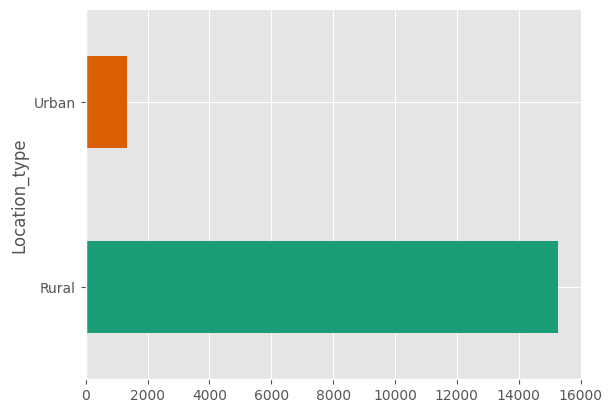

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('Location_type').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

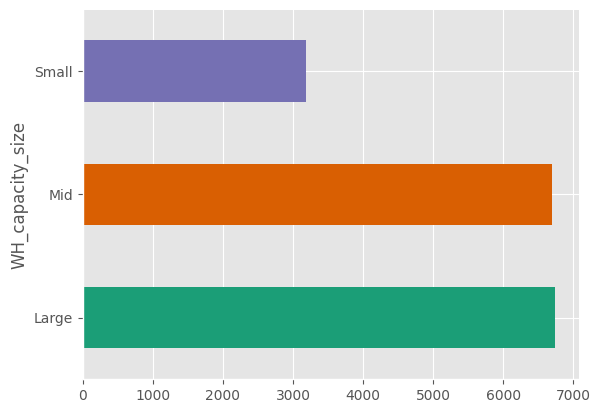

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
Object_dataset.groupby('WH_capacity_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Detecting & Removing Outliners**

In [25]:
#Defining a function to detect the outliner

def detect_outliners(data, multiplier=1.5):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR=Q3 - Q1
  lower_range=Q1 - multiplier * IQR
  upper_range=Q3 + multiplier * IQR
  return lower_range, upper_range


Outliners are identified for the numerical fields of "transport_issue_l1y", "Competitor_in_mkt", "retail_shop_num", "workers_num"

**Train data Outliners**

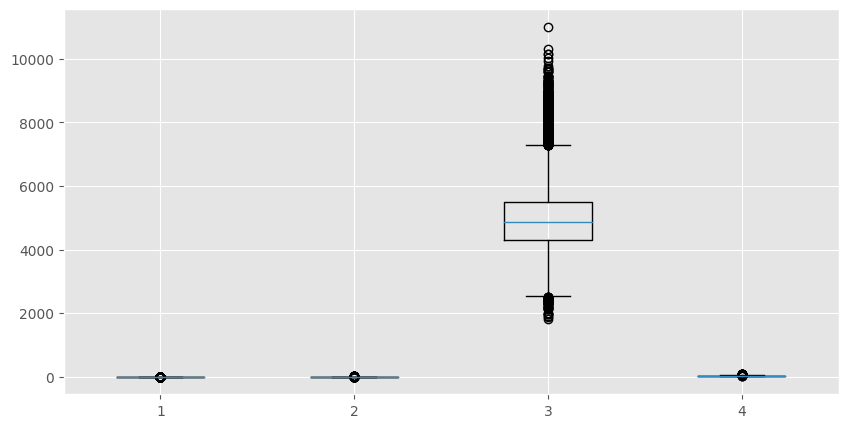

In [26]:
fig = plt.figure(figsize =(10, 5))
numerical_outliner = ["transport_issue_l1y","Competitor_in_mkt","retail_shop_num","workers_num"]
plt.boxplot(supply_train_data[numerical_outliner])

plt.show()

**Test Data Outliners**

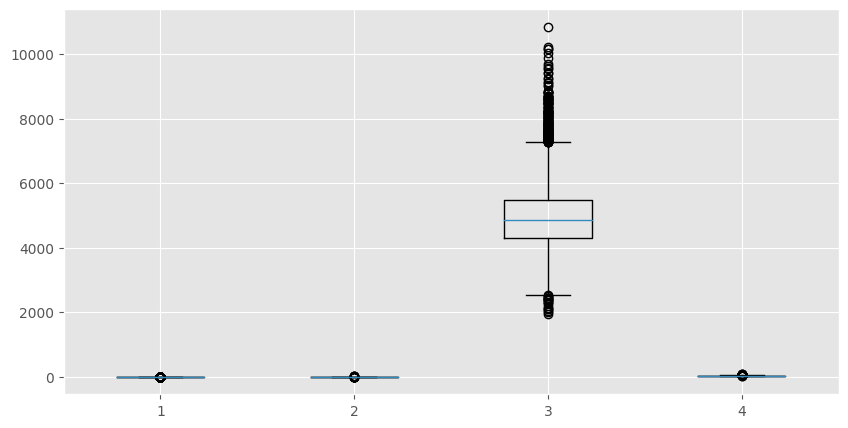

In [27]:
fig = plt.figure(figsize =(10, 5))
numerical_outliner = ["transport_issue_l1y","Competitor_in_mkt","retail_shop_num","workers_num"]
plt.boxplot(supply_test_data[numerical_outliner])

plt.show()

In [28]:
#Initializing the values for "transport_issue_l1y" for train data
low_r, up_r = detect_outliners(supply_train_data["transport_issue_l1y"])
print(low_r,"\n", up_r )

supply_train_data["transport_issue_l1y"] = np.where(supply_train_data["transport_issue_l1y"]>up_r, up_r,supply_train_data["transport_issue_l1y"] )
supply_train_data["transport_issue_l1y"] = np.where(supply_train_data["transport_issue_l1y"]<low_r, low_r,supply_train_data["transport_issue_l1y"] )

supply_train_data["transport_issue_l1y"].sort_values(ascending=True)

-1.5 
 2.5


8309     0.0
9685     0.0
9686     0.0
9688     0.0
9689     0.0
        ... 
9079     2.5
13977    2.5
9069     2.5
13983    2.5
6278     2.5
Name: transport_issue_l1y, Length: 16620, dtype: float64

In [29]:
#Initializing the values for "transport_issue_l1y"
low_r, up_r = detect_outliners(supply_test_data["transport_issue_l1y"])
print(low_r,"\n", up_r )

supply_test_data["transport_issue_l1y"] = np.where(supply_test_data["transport_issue_l1y"]>up_r, up_r,supply_test_data["transport_issue_l1y"] )
supply_test_data["transport_issue_l1y"] = np.where(supply_test_data["transport_issue_l1y"]<low_r, low_r,supply_test_data["transport_issue_l1y"] )

supply_test_data["transport_issue_l1y"].sort_values(ascending=True)

-1.5 
 2.5


0       0.0
3220    0.0
3221    0.0
3223    0.0
3224    0.0
       ... 
1196    2.5
3552    2.5
4951    2.5
4939    2.5
1029    2.5
Name: transport_issue_l1y, Length: 5529, dtype: float64

In [30]:
#Initializing the values for "Competitor_in_mkt"
low_r, up_r = detect_outliners(supply_train_data["Competitor_in_mkt"])
print(low_r,"\n", up_r )

supply_train_data["Competitor_in_mkt"] = np.where(supply_train_data["Competitor_in_mkt"]>up_r, up_r,supply_train_data["Competitor_in_mkt"] )
supply_train_data["Competitor_in_mkt"] = np.where(supply_train_data["Competitor_in_mkt"]<low_r, low_r,supply_train_data["Competitor_in_mkt"] )

supply_train_data["Competitor_in_mkt"].sort_values(ascending=True)

-1.0 
 7.0


6813     0.0
8891     1.0
11324    1.0
9357     1.0
883      1.0
        ... 
3743     7.0
3653     7.0
8405     7.0
8081     7.0
6117     7.0
Name: Competitor_in_mkt, Length: 16620, dtype: float64

In [31]:
#Initializing the values for "Competitor_in_mkt"
low_r, up_r = detect_outliners(supply_test_data["Competitor_in_mkt"])
print(low_r,"\n", up_r )

supply_test_data["Competitor_in_mkt"] = np.where(supply_test_data["Competitor_in_mkt"]>up_r, up_r,supply_test_data["Competitor_in_mkt"] )
supply_test_data["Competitor_in_mkt"] = np.where(supply_test_data["Competitor_in_mkt"]<low_r, low_r,supply_test_data["Competitor_in_mkt"] )

supply_test_data["Competitor_in_mkt"].sort_values(ascending=True)

-1.0 
 7.0


4919    1.0
4529    1.0
1741    1.0
999     1.0
4772    1.0
       ... 
4673    7.0
823     7.0
3002    7.0
765     7.0
5528    7.0
Name: Competitor_in_mkt, Length: 5529, dtype: float64

In [32]:
#Initializing the values for "retail_shop_num"
low_r, up_r = detect_outliners(supply_train_data["retail_shop_num"])
print(low_r,"\n", up_r )

supply_train_data["retail_shop_num"] = np.where(supply_train_data["retail_shop_num"]>up_r, up_r,supply_train_data["retail_shop_num"] )
supply_train_data["retail_shop_num"] = np.where(supply_train_data["retail_shop_num"]<low_r, low_r,supply_train_data["retail_shop_num"] )

supply_train_data["retail_shop_num"].sort_values(ascending=True)

2522.5 
 7286.5


2269     2522.5
14261    2522.5
5359     2522.5
14084    2522.5
4312     2522.5
          ...  
16144    7286.5
8764     7286.5
1310     7286.5
3034     7286.5
723      7286.5
Name: retail_shop_num, Length: 16620, dtype: float64

In [33]:
#Initializing the values for "retail_shop_num"
low_r, up_r = detect_outliners(supply_test_data["retail_shop_num"])
print(low_r,"\n", up_r )

supply_test_data["retail_shop_num"] = np.where(supply_test_data["retail_shop_num"]>up_r, up_r,supply_test_data["retail_shop_num"] )
supply_test_data["retail_shop_num"] = np.where(supply_test_data["retail_shop_num"]<low_r, low_r,supply_test_data["retail_shop_num"] )

supply_test_data["retail_shop_num"].sort_values(ascending=True)

2537.0 
 7265.0


4874    2537.0
3693    2537.0
642     2537.0
2765    2537.0
5087    2537.0
         ...  
4075    7265.0
4586    7265.0
453     7265.0
2177    7265.0
4064    7265.0
Name: retail_shop_num, Length: 5529, dtype: float64

In [34]:
#Initializing the values for "workers_num"
low_r, up_r = detect_outliners(supply_train_data["workers_num"])
print(low_r,"\n", up_r )

supply_train_data["workers_num"] = np.where(supply_train_data["workers_num"]>up_r, up_r,supply_train_data["workers_num"] )
supply_train_data["workers_num"] = np.where(supply_train_data["workers_num"]<low_r, low_r,supply_train_data["workers_num"] )

supply_train_data["workers_num"].sort_values(ascending=True)

10.5 
 46.5


4164     10.5
1399     10.5
6808     10.5
81       11.0
1904     11.0
         ... 
8904     46.5
473      46.5
11392    46.5
8941     46.5
11364    46.5
Name: workers_num, Length: 16620, dtype: float64

In [35]:
#Initializing the values for "workers_num"
low_r, up_r = detect_outliners(supply_test_data["workers_num"])
print(low_r,"\n", up_r )

supply_test_data["workers_num"] = np.where(supply_test_data["workers_num"]>up_r, up_r,supply_test_data["workers_num"] )
supply_test_data["workers_num"] = np.where(supply_test_data["workers_num"]<low_r, low_r,supply_test_data["workers_num"] )

supply_test_data["workers_num"].sort_values(ascending=True)

10.5 
 46.5


450     10.5
3308    10.5
2303    12.0
3275    13.0
3142    13.0
        ... 
3501    46.5
921     46.5
3570    46.5
3310    46.5
2301    46.5
Name: workers_num, Length: 5529, dtype: float64

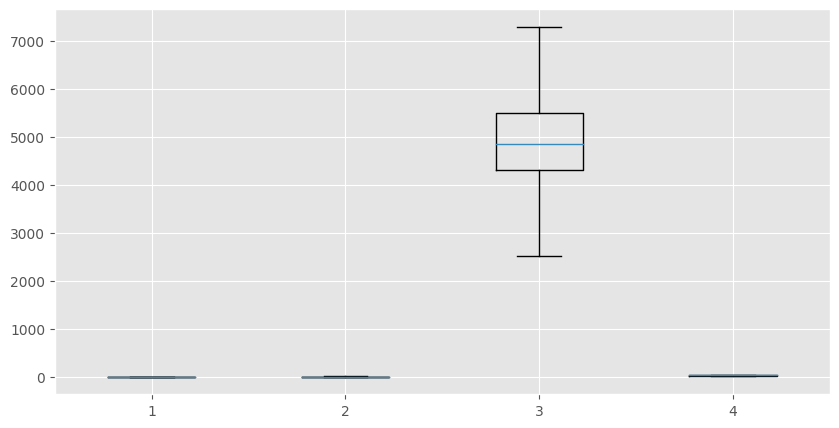

In [36]:
fig = plt.figure(figsize =(10, 5))
numerical_outliner = ["transport_issue_l1y","Competitor_in_mkt","retail_shop_num","workers_num"]
plt.boxplot(supply_train_data[numerical_outliner])

plt.show()

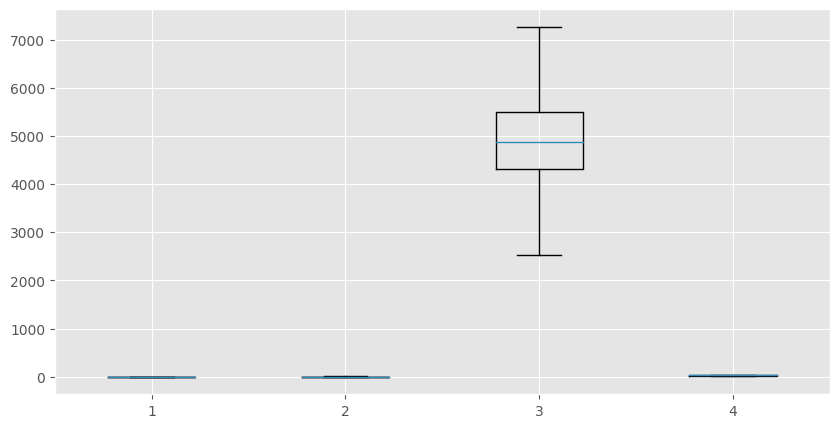

In [37]:
fig = plt.figure(figsize =(10, 5))
numerical_outliner = ["transport_issue_l1y","Competitor_in_mkt","retail_shop_num","workers_num"]
plt.boxplot(supply_test_data[numerical_outliner])

plt.show()

# **Encoding Categorical Variables**


```
# Convert categorical variables into numerical format using involve techniques like one-hot encoding or label encoding
```



**Train data Encoding**

In [39]:
#Importing One hot encoder from Sklearn package
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Defining the columns to convert to encoding
OHE_columns_to_encode = ["Location_type","zone","WH_regional_zone","wh_owner_type"]

#Defining object by calling class
OHE_encoder = OneHotEncoder(sparse_output=False, drop="first")

#Using onehot encoding
OHE_encoded_train_dataset = OHE_encoder.fit_transform(supply_train_data[OHE_columns_to_encode])

#Creating a dataFrame with encoded data
OHE_encoded_train_dataframe = pd.DataFrame(OHE_encoded_train_dataset, columns = OHE_encoder.get_feature_names_out(OHE_columns_to_encode))


In [40]:
#Defining the columns to convert to encoding
LE_columns_to_encode = ["WH_capacity_size","approved_wh_govt_certificate"]
label_encoders={}
LE_encoded_train_dataset={}

for column in LE_columns_to_encode:
    label_encoders[column] = LabelEncoder()
    LE_encoded_train_dataset[column] = label_encoders[column].fit_transform(supply_train_data[column])

#Creating a dataFrame with encoded data
LE_encoded_train_dataframe = pd.DataFrame(LE_encoded_train_dataset)

#Combining the dataframes
train_data_encoded = pd.concat([supply_train_data.drop(columns=OHE_columns_to_encode+LE_columns_to_encode ),OHE_encoded_train_dataframe,LE_encoded_train_dataframe],axis=1)

train_data_encoded.head(10)

,Ware_house_ID,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,WH_capacity_size,approved_wh_govt_certificate
0,WH_100000,3,1.0,2.0,4651.0,24,0,1,1,91,29.0,2009.0,13,0,5,15,17115,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,0
1,WH_100001,0,0.0,4.0,6217.0,47,0,0,1,210,31.0,2009.0,4,0,3,17,5074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,WH_100002,1,0.0,4.0,4306.0,64,0,0,0,161,37.0,2009.0,17,0,6,22,23137,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
3,WH_100003,7,2.5,2.0,6000.0,50,0,0,0,103,21.0,2009.0,17,1,3,27,22115,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,WH_100004,3,1.0,2.0,4740.0,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,3,1.0,6.0,4779.0,70,0,0,0,240,19.0,2009.0,14,0,5,23,16094,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,3
16616,WH_116616,2,0.0,2.0,5718.0,26,0,0,1,164,30.0,2009.0,17,0,6,24,21113,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3
16617,WH_116617,5,0.0,4.0,4514.0,50,1,0,1,211,24.0,2003.0,24,1,5,29,28117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2
16618,WH_116618,3,2.0,3.0,5829.0,59,1,0,1,119,28.0,2007.0,16,0,5,15,21103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,0


**Test data set Encoding**

In [41]:

#Using onehot encoding
OHE_encoded_test_dataset = OHE_encoder.fit_transform(supply_test_data[OHE_columns_to_encode])

#Creating a dataFrame with encoded data
OHE_encoded_test_dataframe = pd.DataFrame(OHE_encoded_test_dataset, columns = OHE_encoder.get_feature_names_out(OHE_columns_to_encode))

#Label Encoding for test data
label_encoders={}
LE_encoded_test_dataset={}

#For loop to iterate in the columns
for column in LE_columns_to_encode:
    label_encoders[column] = LabelEncoder()
    LE_encoded_test_dataset[column] = label_encoders[column].fit_transform(supply_test_data[column])

#Creating a dataFrame with encoded data
LE_encoded_test_dataframe = pd.DataFrame(LE_encoded_test_dataset)

#Combining the dataframes
test_data_encoded = pd.concat([supply_test_data.drop(columns=OHE_columns_to_encode+LE_columns_to_encode ),OHE_encoded_test_dataframe,LE_encoded_test_dataframe],axis=1)

test_data_encoded.head(10)

,Ware_house_ID,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,WH_capacity_size,approved_wh_govt_certificate
0,WH_116621,5,0.0,3.0,5590.0,15,0,0,0,156,30.0,2006.0,24,0,2,5,30132,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,WH_116622,5,0.0,2.0,5856.0,40,0,0,1,79,31.0,2019.0,5,1,2,24,6075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4
2,WH_116623,3,0.0,3.0,4803.0,40,0,0,1,70,41.0,2008.0,19,1,5,9,24076,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1
3,WH_116624,5,2.0,2.0,4784.0,15,0,0,1,255,33.0,2017.0,9,1,3,11,13092,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
4,WH_116625,6,0.0,4.0,3699.0,24,0,0,0,205,20.0,1999.0,25,0,4,26,29071,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,WH_122145,8,1.0,3.0,5030.0,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
5525,WH_122146,3,1.0,3.0,4320.0,60,0,0,0,170,28.0,2010.0,26,0,5,9,33108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,4
5526,WH_122147,7,2.0,2.0,5268.0,64,0,0,0,99,22.0,2010.0,20,0,6,4,24072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3
5527,WH_122148,6,2.0,4.0,4378.0,32,0,0,0,220,17.0,2010.0,13,0,3,28,15055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,2


# **Feature Scaling**

Feature scaling is a crucial preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of input features, such as gradient descent-based methods (e.g., linear regression, logistic regression, neural networks, etc.) or distance-based algorithms (e.g., k-nearest neighbors, support vector machines, etc.). Feature scaling ensures that all features have the same scale, which can help improve the performance and convergence of these algorithms

In [43]:
#Importing Feature scaling from Sklearn package
from sklearn.preprocessing import StandardScaler

#Create an object
scaler = StandardScaler()

#Feature scaling of train data
train_scaled_data = scaler.fit_transform(train_data_encoded.select_dtypes(include=["number"]))

#Feature scaling of test data
test_scaled_data = scaler.fit_transform(test_data_encoded.select_dtypes(include=["number"]))

#Converting scaled data to dataframe
train_scaled_df=pd.DataFrame(train_scaled_data, columns=train_data_encoded.select_dtypes(include=["number"]).columns)

#Converting scaled data to dataframe
test_scaled_df=pd.DataFrame(test_scaled_data, columns=test_data_encoded.select_dtypes(include=["number"]).columns)


In [44]:
#Combining train and test data sets
final_data = pd.concat([train_scaled_df,test_scaled_df ])

final_data.shape

(22149, 28)

# **Machine Learning Modeling**

In [45]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

X = final_data.drop(['product_wg_ton'], axis=1) #Feature
Y = final_data['product_wg_ton'] # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42 )

X_test


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,WH_capacity_size,approved_wh_govt_certificate
6549,-1.199716,1.992099,0.800771,0.553498,-0.775269,3.053356,4.105091,-1.380065,-1.172611,1.165206,-0.033214,-0.886897,-0.664234,1.485823,1.307790,-0.297096,-0.832144,-0.583650,1.457416,-0.369653,-0.363210,-0.445857,-0.471898,-0.709789,-0.922936,1.634595,-1.456835
10821,1.486226,-0.716267,-0.974921,-0.449539,-1.272487,-0.327509,-0.243600,0.724604,-0.199714,0.040897,-1.858088,0.531755,-0.664234,1.485823,0.611702,-0.297096,1.201714,-0.583650,-0.686146,-0.369653,-0.363210,-0.445857,2.119100,-0.709789,-0.922936,-1.058270,-0.131497
5112,-0.386790,-0.716688,-0.993534,-0.706518,0.743927,2.932398,-0.229219,0.722125,-1.693342,1.563144,-1.077781,0.859732,1.533267,-0.868713,0.930225,-0.304092,1.198648,-0.588141,-0.675956,-0.363087,2.826702,-0.456066,-0.475048,-0.696772,1.112862,0.274037,-0.792736
5915,1.486226,0.367080,-0.087075,-0.084516,-0.091594,3.053356,-0.243600,0.724604,0.884828,0.181436,0.879222,-0.013881,-0.664234,1.485823,-0.780475,-0.297096,1.201714,-0.583650,-0.686146,2.705239,-0.363210,-0.445857,-0.471898,-0.709789,-0.922936,0.288162,0.531172
477,1.533267,-0.716688,-0.091374,-0.305763,1.495878,-0.341018,-0.229219,0.722125,-1.229631,0.027174,-0.518403,-0.335177,1.533267,1.483449,0.815493,-0.304092,1.198648,-0.588141,-0.675956,-0.363087,-0.353769,2.192663,-0.475048,-0.696772,1.112862,0.274037,-0.131545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,1.102520,1.992099,-0.974921,0.847171,-0.091594,-0.327509,-0.243600,0.724604,1.522794,-0.099641,-0.033214,-1.432533,-0.664234,1.485823,-0.896489,-0.297096,-0.832144,-0.583650,1.457416,-0.369653,-0.363210,2.242873,-0.471898,-0.709789,1.083499,0.288162,-1.456835
5489,-1.538824,-0.716688,-0.091374,-0.235708,-0.008024,-0.341018,-0.229219,0.722125,-1.469482,2.470763,0.040974,-0.226549,-0.652202,-0.868713,-0.790758,-0.304092,-0.834273,1.700271,-0.675956,2.754161,-0.353769,-0.456066,-0.475048,-0.696772,-0.898584,0.274037,0.529646
5372,-0.770801,0.384026,-0.993534,-0.878564,0.054638,-0.341018,-0.229219,0.722125,0.913030,2.470763,0.040974,0.968360,-0.652202,-0.280673,-1.020222,3.288480,1.198648,-0.588141,-0.675956,-0.363087,-0.353769,-0.456066,2.105051,-0.696772,1.112862,-1.064434,-0.792736
8700,0.335108,-0.716267,-0.087075,-0.974842,0.529929,-0.327509,-0.243600,-1.380065,1.251658,-0.521257,0.331760,-0.341262,1.505493,-0.883056,0.263658,-0.297096,-0.832144,1.713357,-0.686146,-0.369653,-0.363210,-0.445857,-0.471898,-0.709789,-0.922936,1.634595,-0.131497


**Training Data with Linear Regression Model**

In [46]:
model_LIR = LinearRegression()
model_LIR.fit(X_train, Y_train)

LinearRegression()

In [47]:
#Predicting the test target values using test feactures
Y_pred_LIR = model_LIR.predict(X_test)

In [48]:
#Measuring Mean squared error and r2 error
mse_LIR = mean_squared_error(Y_test, Y_pred_LIR)
r2_LIR = r2_score(Y_test, Y_pred_LIR)
print("Mean_square_error of Linear Regression Model:",mse_LIR,"\n")
print("r2_score of Linear Regression Model:",r2_LIR,"\n")

Mean_square_error of Linear Regression Model: 0.022945975186560618 

r2_score of Linear Regression Model: 0.9773260865995802 



**Training data with Decision Tree Model**

In [49]:
#Training dataset with Decision Tree Regressor
model_DTR = DecisionTreeRegressor(random_state=42)
model_DTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
#Predicting the test target values using test feactures
Y_pred_DTR = model_DTR.predict(X_test)

#Measuring Mean squared error and r2 error for decision Tree model
mse_DTR = mean_squared_error(Y_test, Y_pred_DTR)
r2_DTR = r2_score(Y_test, Y_pred_DTR)
print("Mean_square_error of Decision Tree Regression Model:",mse_DTR,"\n")
print("r2_score of Decision Tree Regression Model:",r2_DTR,"\n")

Mean_square_error of Decision Tree Regression Model: 0.010955259795720413 

r2_score of Decision Tree Regression Model: 0.989174632593835 



**Training data with Random Forest Model**

In [51]:
#Training dataset with Random Forest Regressor
model_RFR = RandomForestRegressor(random_state=42)
model_RFR.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [52]:
#Predicting the test target values using test feactures
Y_pred_RFR = model_RFR.predict(X_test)

#Measuring Mean squared error and r2 error for Random Forest model
mse_RFR = mean_squared_error(Y_test, Y_pred_RFR)
r2_RFR = r2_score(Y_test, Y_pred_RFR)
print("Mean_square_error of Random Forest Regression Model:",mse_RFR,"\n")
print("r2_score of Random Forest Regression Model:",r2_RFR,"\n")

Mean_square_error of Random Forest Regression Model: 0.006064737768270746 

r2_score of Random Forest Regression Model: 0.9940071695434166 



**Training data with Support Vector Machine Model**

In [53]:
#Training dataset with Support Vector Machine
model_SVR = SVR()
model_SVR.fit(X_train, Y_train)

SVR()

In [54]:
#Predicting the test target values using test feactures
Y_pred_SVR = model_SVR.predict(X_test)

#Measuring Mean squared error and r2 error for Support Vector Model
mse_SVR = mean_squared_error(Y_test, Y_pred_SVR)
r2_SVR = r2_score(Y_test, Y_pred_SVR)
print("Mean_square_error of Support Vector Model:",mse_SVR,"\n")
print("r2_score of Support Vector Model:",r2_SVR,"\n")

Mean_square_error of Support Vector Model: 0.014389475011471605 

r2_score of Support Vector Model: 0.9857811355745427 



**Training data with Gradient Boosting Model**

In [55]:
#Trainin dataset with Gradient Boosting Model
model_GBR = GradientBoostingRegressor(random_state=42)
model_GBR.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
#Predicting the test target values using test feature
Y_pred_GBR = model_GBR.predict(X_test)

#Measuring Mean Squaared error and r2 error for the Gradient Boosting Model
mse_GBR = mean_squared_error(Y_test, Y_pred_GBR)
r2_GBR = r2_score(Y_test, Y_pred_GBR)
print("Mean_square_error of Gradient Boosting Model:",mse_GBR,"\n")
print("r2_score of Gradient Boosting Model:",r2_GBR,"\n")

Mean_square_error of Gradient Boosting Model: 0.00590308942440377 

r2_score of Gradient Boosting Model: 0.9941669012837485 



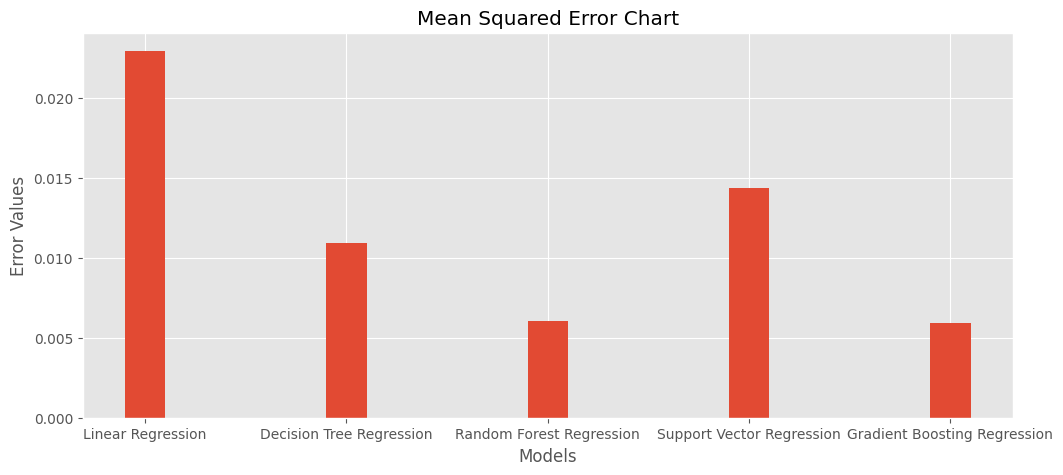

In [76]:
mse_list = {
  "Linear Regression": mse_LIR,
  "Decision Tree Regression": mse_DTR,
  "Random Forest Regression": mse_RFR,
  "Support Vector Regression": mse_SVR,
  "Gradient Boosting Regression": mse_GBR
}

# Extract keys and values from the dictionary
keys = list(mse_list.keys())
values = list(mse_list.values())

fig = plt.figure(figsize =(12, 5))

#Creating bar chart
plt.bar(keys, values, width=0.2)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Mean Squared Error Chart')

# Show plot
plt.show()

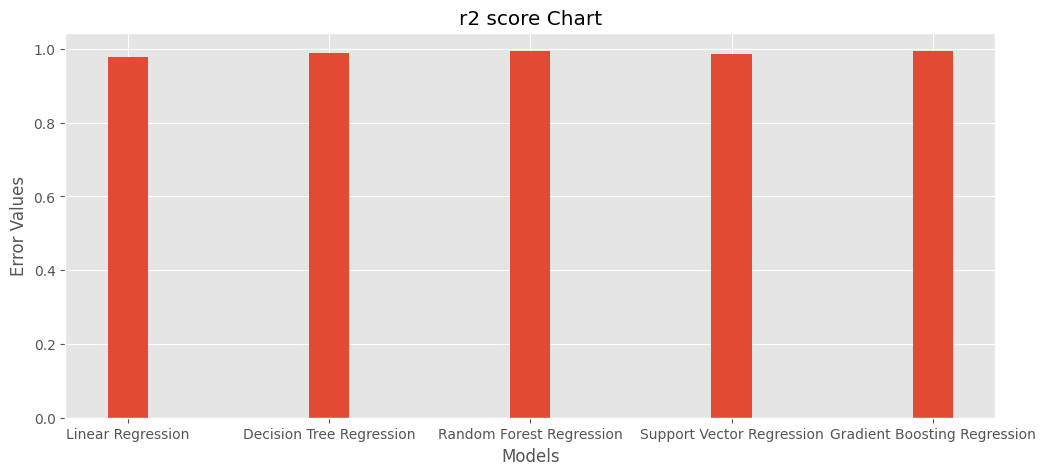

In [98]:
r2_list = {
  "Linear Regression": r2_LIR,
  "Decision Tree Regression": r2_DTR,
  "Random Forest Regression": r2_RFR,
  "Support Vector Regression": r2_SVR,
  "Gradient Boosting Regression": r2_GBR
}

# Extract keys and values from the dictionary
keys = list(r2_list.keys())
values = list(r2_list.values())

fig = plt.figure(figsize =(12, 5))

#Creating bar chart
plt.bar(keys, values, width=0.2)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('r2 score Chart')

# Show plot
plt.show()


# **Conclusion on Best Regression Model**


> While considering mean squared error, **Random Forest Regression model** choosen to be the best model with a MSE of **0.006064737768270746**


---


> While considering r2_score, **Gradient Boosting Regression** choosen to be the best model with a r2 score of **0.9941669012837485**, However, Random Forest Regression Model has a r2 score of **0.9940071695434166**



---



> Therefore considering both error method, ***Random Forest Regression Model*** has been choosen to be best model suitabel for the specific problem








1.   Majority of the Warehouses are situated in the Rural Area, which could potentialy increase the logistics.
2.   Comparing of warehouse vs product wg ton is unbalanced in Urban Area, where supply is more comparing to the number of warehouse




# **Recommendation**



1.   A robust team must be deployed to attend any major breakdown whihc could potentialy lose the logistics movement
2.   Warehouses size in the Urban Area must be upgraded in line with the product wg ton trend


